Objetivo:
Desenvolver um programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de uma cadeia atômica finita com 2, 3 e 4 átomos, incluindo interações com vizinhos mais distantes (segunda vizinhança) no último caso.

 

Instruções:
Cadeia linear com 2 massas:

Modele uma cadeia com duas massas m_1 e m_2 conectadas por uma mola de constante k.

Ambas as extremidades são livres (não ligadas a paredes).

Estude os efeitos da diferença entre m_1 e m_2 nas frequências e nos deslocamentos relativos.

Extensão para 3 massas:

Conecte três massas em linha com molas entre elas.

Varie as massas e analise o comportamento vibracional do sistema.

Mantenha as extremidades livres.

Extensão para 4 massas com inclusão de segunda vizinhança:

Agora, modele uma cadeia com quatro massas m_1, m_2, m_3, m_4, conectadas por molas com constante k entre vizinhos imediatos.

Adicione molas adicionais conectando pares de massas a duas posições de distância:

Entre m_1 e m_3

Entre m_2 e m_4

 

Use uma constante k’ para as molas de segunda vizinhança (ex: k’ = 0.2k, 0.5k, etc.).

Analise:

Como a presença de segunda vizinhança altera as frequências naturais

Quais modos normais são mais afetados por essas interações adicionais

 

Visualizações Recomendadas:
Gráficos das frequências naturais para cada configuração

Visualização dos modos normais (vetores de deslocamento)

Comparação entre o caso com e sem interações de segunda vizinhança para 4 átomos

Entrega Esperada:
Código funcional e bem comentado

Gráficos claros dos resultados

Texto explicativo (até 300 palavras) discutindo:

O efeito da variação das massas

O impacto da inclusão de segundos vizinhos

A interpretação física das modificações observadas nos modos

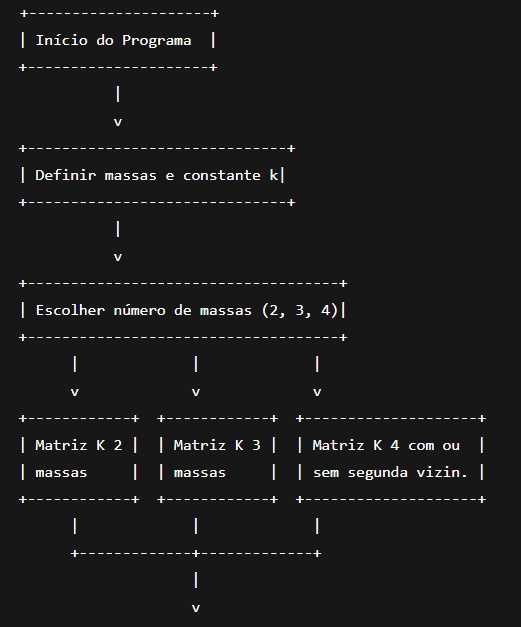
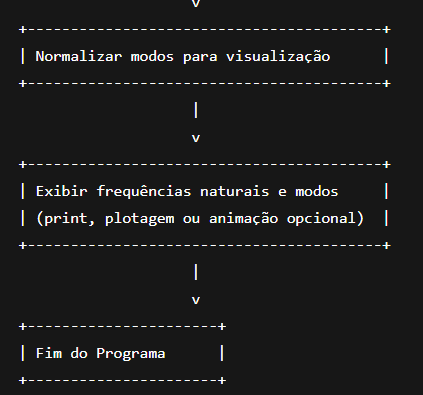

=== ANÁLISE DE CADEIAS ATÔMICAS ===

1. Frequências naturais para diferentes números de átomos:


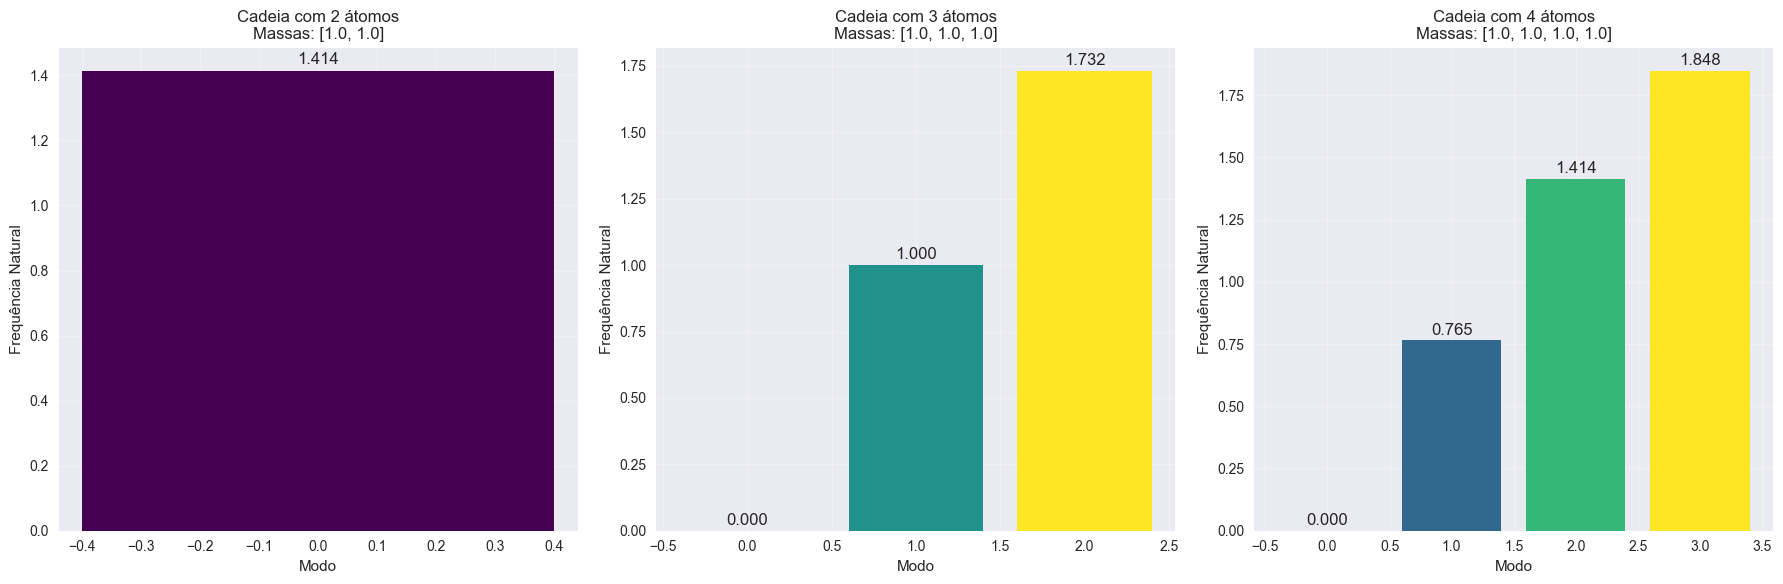


2. Modos normais para diferentes configurações:


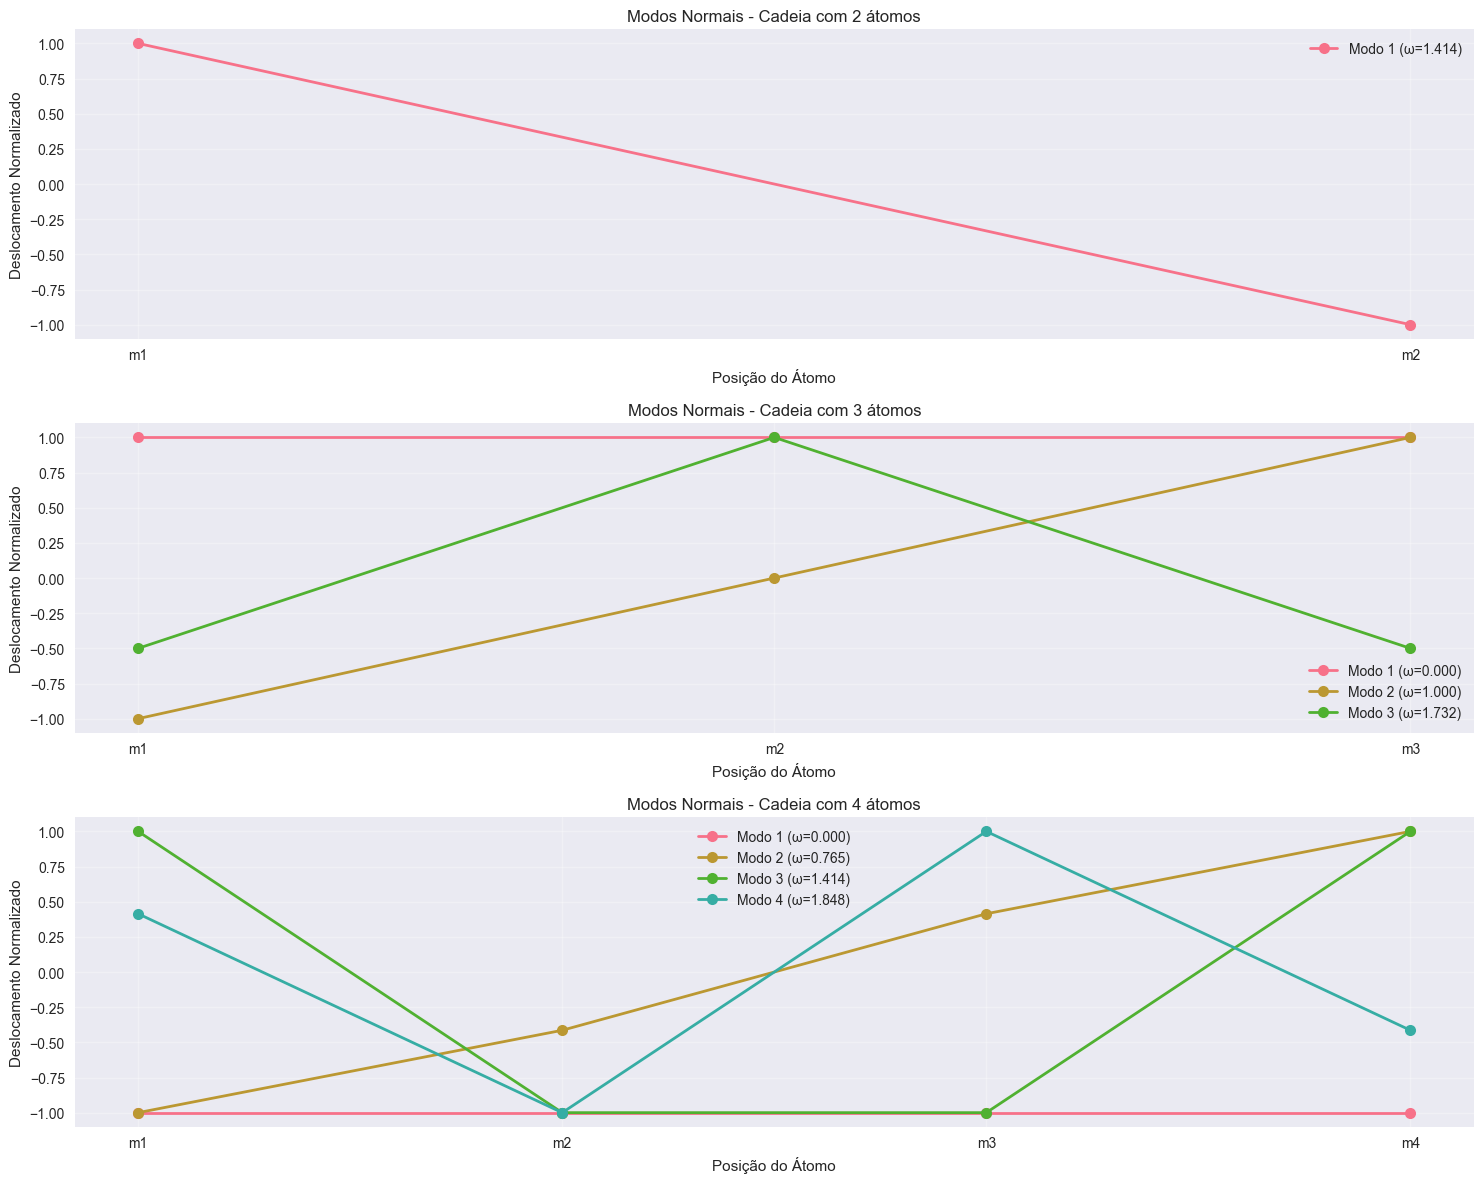


3. Efeito da variação das massas:


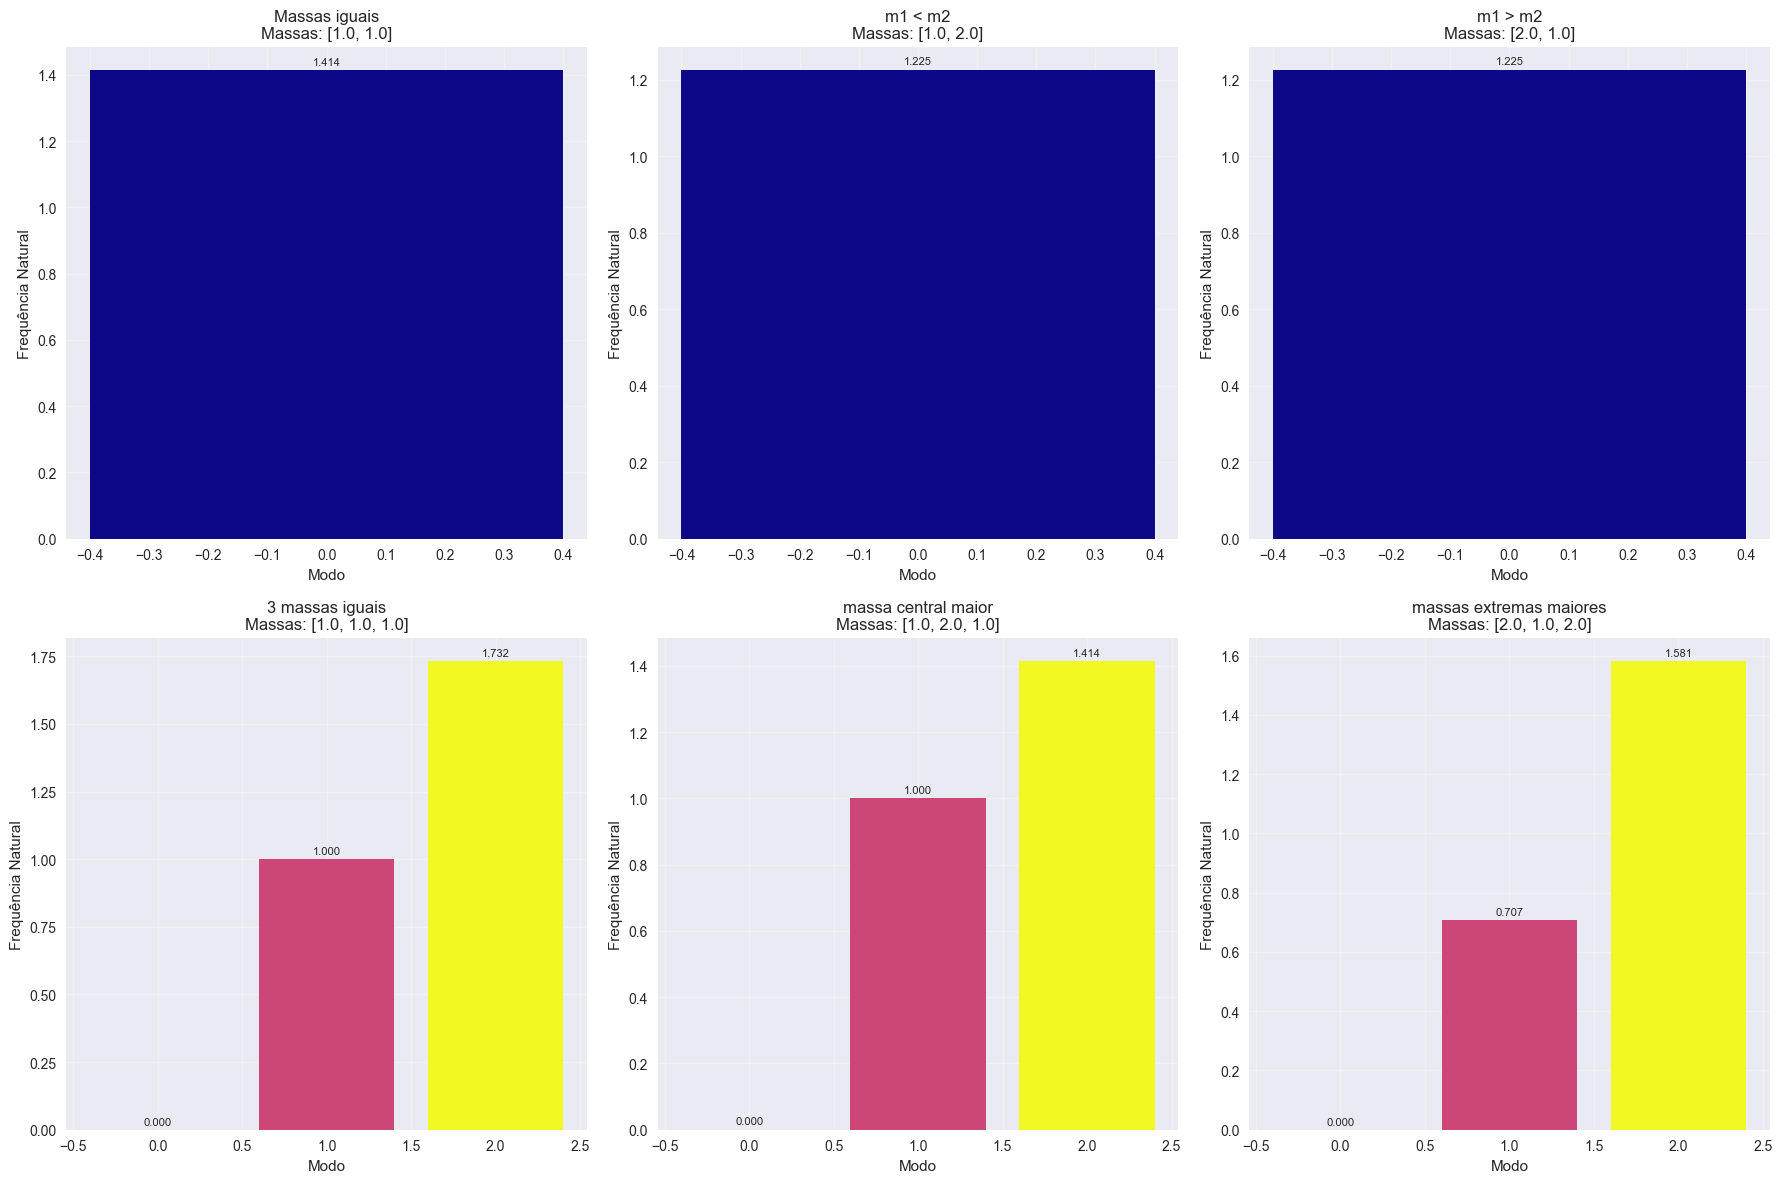


4. Comparação com e sem interações de segunda vizinhança:


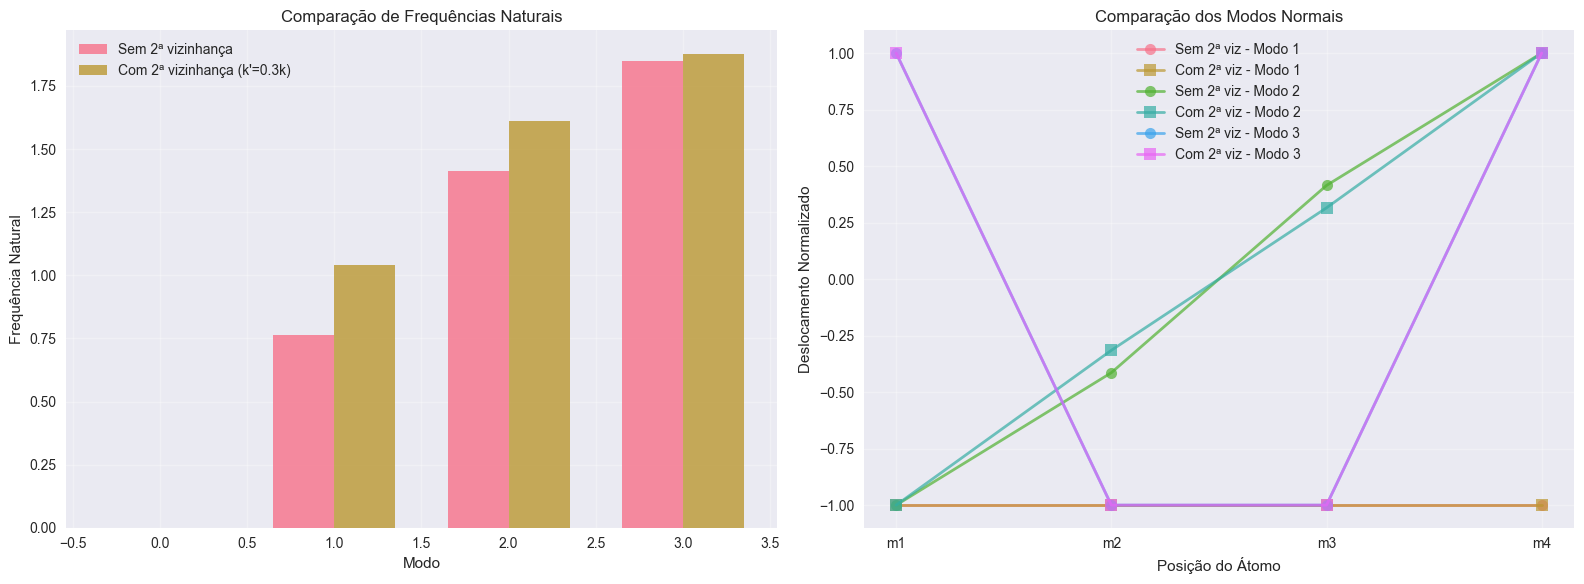

Frequências naturais sem segunda vizinhança:
  Modo 1: 0.0000
  Modo 2: 0.7654
  Modo 3: 1.4142
  Modo 4: 1.8478

Frequências naturais com segunda vizinhança (k'=0.3k):
  Modo 1: 0.0000
  Modo 2: 1.0389
  Modo 3: 1.6125
  Modo 4: 1.8763

Variação percentual nas frequências:
  Modo 1: +89.08%
  Modo 2: +35.74%
  Modo 3: +14.02%
  Modo 4: +1.55%
=== ANÁLISE DETALHADA - CADEIA COM 2 ÁTOMOS ===

1. Cadeia com massas iguais (m1 = m2 = 1.0):
   Matriz de massa:
[[1. 0.]
 [0. 1.]]
   Matriz de força:
[[ 1. -1.]
 [-1.  1.]]
   Matriz dinâmica:
[[ 1. -1.]
 [-1.  1.]]
   Frequências naturais: [1.41421356]
   Modos normais (normalizados):
[[ 1.]
 [-1.]]

2. Cadeia com massas diferentes (m1 = 1.0, m2 = 2.0):
   Matriz de massa:
[[1. 0.]
 [0. 2.]]
   Matriz de força:
[[ 1. -1.]
 [-1.  1.]]
   Matriz dinâmica:
[[ 1.  -1. ]
 [-0.5  0.5]]
   Frequências naturais: [1.22474487]
   Modos normais (normalizados):
[[ 1. ]
 [-0.5]]

3. Comparação:
   Frequências com massas iguais: [1.41421356]
   Frequências

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
import seaborn as sns

# Configuração para melhor visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

class CadeiaAtomica:
    """
    Classe para calcular frequências naturais e modos normais de cadeias atômicas.
    """
    
    def __init__(self, massas, k=1.0, k_second=None):
        """
        Inicializa a cadeia atômica.
        
        Parâmetros:
        massas: array com as massas dos átomos
        k: constante da mola entre vizinhos imediatos
        k_second: constante da mola para segunda vizinhança (opcional)
        """
        self.massas = np.array(massas)
        self.k = k
        self.k_second = k_second
        self.n_atomos = len(massas)
        
    def construir_matriz_dinamica(self):
        """
        Constrói a matriz dinâmica (matriz de força dividida pelas massas).
        """
        n = self.n_atomos
        D = np.zeros((n, n))
        
        # Matriz de massa
        M = np.diag(self.massas)
        
        # Matriz de força
        K = np.zeros((n, n))
        
        # Interações entre vizinhos imediatos
        for i in range(n-1):
            K[i, i] += self.k
            K[i, i+1] = -self.k
            K[i+1, i] = -self.k
            K[i+1, i+1] += self.k
        
        # Interações de segunda vizinhança (se especificado)
        if self.k_second is not None and n >= 4:
            # m1-m3 e m2-m4
            if n >= 3:
                K[0, 2] += -self.k_second
                K[2, 0] += -self.k_second
                K[0, 0] += self.k_second
                K[2, 2] += self.k_second
            
            if n >= 4:
                K[1, 3] += -self.k_second
                K[3, 1] += -self.k_second
                K[1, 1] += self.k_second
                K[3, 3] += self.k_second
        
        # Matriz dinâmica: D = M^(-1) * K
        M_inv = np.linalg.inv(M)
        D = M_inv @ K
        
        return D, K, M
    
    def calcular_frequencias_modos(self):
        """
        Calcula as frequências naturais e modos normais.
        """
        D, K, M = self.construir_matriz_dinamica()
        
        # Diagonalização da matriz dinâmica
        eigenvals, eigenvecs = eig(D)
        
        # Frequências naturais (raiz quadrada dos autovalores)
        # Filtramos valores negativos ou muito pequenos (modo de translação)
        freq_naturais = np.sqrt(np.abs(eigenvals))
        
        # Ordenar por frequência
        indices_ordenados = np.argsort(freq_naturais)
        freq_naturais = freq_naturais[indices_ordenados]
        modos_normais = eigenvecs[:, indices_ordenados]
        
        return freq_naturais, modos_normais, D, K, M
    
    def normalizar_modos(self, modos):
        """
        Normaliza os modos normais para facilitar a visualização.
        """
        modos_norm = np.zeros_like(modos)
        for i in range(modos.shape[1]):
            modo = modos[:, i]
            # Normalizar pelo valor máximo absoluto
            max_val = np.max(np.abs(modo))
            if max_val > 0:
                modos_norm[:, i] = modo / max_val
        return modos_norm

def plotar_frequencias(massas_list, k=1.0, k_second=None):
    """
    Plota as frequências naturais para diferentes configurações de massas.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, massas in enumerate(massas_list):
        cadeia = CadeiaAtomica(massas, k, k_second)
        freq, modos, _, _, _ = cadeia.calcular_frequencias_modos()
        
        # Filtrar frequências não-zero
        freq_nao_zero = freq[freq > 1e-10]
        
        axes[idx].bar(range(len(freq_nao_zero)), freq_nao_zero, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(freq_nao_zero))))
        axes[idx].set_title(f'Cadeia com {len(massas)} átomos\nMassas: {massas}')
        axes[idx].set_xlabel('Modo')
        axes[idx].set_ylabel('Frequência Natural')
        axes[idx].grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, v in enumerate(freq_nao_zero):
            axes[idx].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plotar_modos_normais(massas_list, k=1.0, k_second=None):
    """
    Plota os modos normais para diferentes configurações.
    """
    fig, axes = plt.subplots(len(massas_list), 1, figsize=(15, 4*len(massas_list)))
    if len(massas_list) == 1:
        axes = [axes]
    
    for idx, massas in enumerate(massas_list):
        cadeia = CadeiaAtomica(massas, k, k_second)
        freq, modos, _, _, _ = cadeia.calcular_frequencias_modos()
        modos_norm = cadeia.normalizar_modos(modos)
        
        # Filtrar modos com frequência não-zero
        freq_nao_zero = freq[freq > 1e-10]
        modos_nao_zero = modos_norm[:, freq > 1e-10]
        
        # Plotar modos
        x_pos = np.arange(len(massas))
        for i in range(modos_nao_zero.shape[1]):
            axes[idx].plot(x_pos, modos_nao_zero[:, i], 
                          marker='o', linewidth=2, markersize=8, 
                          label=f'Modo {i+1} (ω={freq_nao_zero[i]:.3f})')
        
        axes[idx].set_title(f'Modos Normais - Cadeia com {len(massas)} átomos')
        axes[idx].set_xlabel('Posição do Átomo')
        axes[idx].set_ylabel('Deslocamento Normalizado')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_xticks(x_pos)
        axes[idx].set_xticklabels([f'm{i+1}' for i in range(len(massas))])
    
    plt.tight_layout()
    plt.show()

def comparar_segunda_vizinhanca():
    """
    Compara o comportamento com e sem interações de segunda vizinhança.
    """
    massas = [1.0, 1.0, 1.0, 1.0]  # 4 átomos iguais
    
    # Sem segunda vizinhança
    cadeia_sem = CadeiaAtomica(massas, k=1.0, k_second=None)
    freq_sem, modos_sem, _, _, _ = cadeia_sem.calcular_frequencias_modos()
    
    # Com segunda vizinhança
    cadeia_com = CadeiaAtomica(massas, k=1.0, k_second=0.3)
    freq_com, modos_com, _, _, _ = cadeia_com.calcular_frequencias_modos()
    
    # Filtrar frequências não-zero
    freq_sem_nao_zero = freq_sem[freq_sem > 1e-10]
    freq_com_nao_zero = freq_com[freq_com > 1e-10]
    
    # Plotar comparação
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Frequências
    x = np.arange(len(freq_sem_nao_zero))
    width = 0.35
    
    ax1.bar(x - width/2, freq_sem_nao_zero, width, label='Sem 2ª vizinhança', alpha=0.8)
    ax1.bar(x + width/2, freq_com_nao_zero, width, label='Com 2ª vizinhança (k\'=0.3k)', alpha=0.8)
    
    ax1.set_xlabel('Modo')
    ax1.set_ylabel('Frequência Natural')
    ax1.set_title('Comparação de Frequências Naturais')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Modos normais
    modos_sem_norm = cadeia_sem.normalizar_modos(modos_sem[:, freq_sem > 1e-10])
    modos_com_norm = cadeia_com.normalizar_modos(modos_com[:, freq_com > 1e-10])
    
    x_pos = np.arange(4)
    for i in range(min(modos_sem_norm.shape[1], 3)):  # Plotar apenas os 3 primeiros modos
        ax2.plot(x_pos, modos_sem_norm[:, i], 'o-', linewidth=2, markersize=8,
                label=f'Sem 2ª viz - Modo {i+1}', alpha=0.7)
        ax2.plot(x_pos, modos_com_norm[:, i], 's-', linewidth=2, markersize=8,
                label=f'Com 2ª viz - Modo {i+1}', alpha=0.7)
    
    ax2.set_xlabel('Posição do Átomo')
    ax2.set_ylabel('Deslocamento Normalizado')
    ax2.set_title('Comparação dos Modos Normais')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(['m1', 'm2', 'm3', 'm4'])
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir valores numéricos
    print("Frequências naturais sem segunda vizinhança:")
    for i, freq in enumerate(freq_sem_nao_zero):
        print(f"  Modo {i+1}: {freq:.4f}")
    
    print("\nFrequências naturais com segunda vizinhança (k'=0.3k):")
    for i, freq in enumerate(freq_com_nao_zero):
        print(f"  Modo {i+1}: {freq:.4f}")
    
    print(f"\nVariação percentual nas frequências:")
    for i in range(min(len(freq_sem_nao_zero), len(freq_com_nao_zero))):
        variacao = ((freq_com_nao_zero[i] - freq_sem_nao_zero[i]) / freq_sem_nao_zero[i]) * 100
        print(f"  Modo {i+1}: {variacao:+.2f}%")

def analisar_variacao_massas():
    """
    Analisa o efeito da variação das massas nas frequências naturais.
    """
    # Diferentes configurações de massas
    configs_massas = [
        ([1.0, 1.0], "Massas iguais"),
        ([1.0, 2.0], "m1 < m2"),
        ([2.0, 1.0], "m1 > m2"),
        ([1.0, 1.0, 1.0], "3 massas iguais"),
        ([1.0, 2.0, 1.0], "massa central maior"),
        ([2.0, 1.0, 2.0], "massas extremas maiores")
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, (massas, titulo) in enumerate(configs_massas):
        cadeia = CadeiaAtomica(massas, k=1.0)
        freq, modos, _, _, _ = cadeia.calcular_frequencias_modos()
        
        # Filtrar frequências não-zero
        freq_nao_zero = freq[freq > 1e-10]
        
        # Plotar frequências
        axes[idx].bar(range(len(freq_nao_zero)), freq_nao_zero, 
                     color=plt.cm.plasma(np.linspace(0, 1, len(freq_nao_zero))))
        axes[idx].set_title(f'{titulo}\nMassas: {massas}')
        axes[idx].set_xlabel('Modo')
        axes[idx].set_ylabel('Frequência Natural')
        axes[idx].grid(True, alpha=0.3)
        
        # Adicionar valores
        for i, v in enumerate(freq_nao_zero):
            axes[idx].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

def analise_detalhada_caso_2_atomos():
    """
    Análise detalhada do caso de 2 átomos com massas diferentes.
    """
    print("=== ANÁLISE DETALHADA - CADEIA COM 2 ÁTOMOS ===\n")
    
    # Caso 1: Massas iguais
    cadeia_igual = CadeiaAtomica([1.0, 1.0], k=1.0)
    freq_igual, modos_igual, D_igual, K_igual, M_igual = cadeia_igual.calcular_frequencias_modos()
    
    print("1. Cadeia com massas iguais (m1 = m2 = 1.0):")
    print(f"   Matriz de massa:\n{M_igual}")
    print(f"   Matriz de força:\n{K_igual}")
    print(f"   Matriz dinâmica:\n{D_igual}")
    print(f"   Frequências naturais: {freq_igual[freq_igual > 1e-10]}")
    print(f"   Modos normais (normalizados):\n{cadeia_igual.normalizar_modos(modos_igual[:, freq_igual > 1e-10])}")
    
    # Caso 2: Massas diferentes
    cadeia_diferente = CadeiaAtomica([1.0, 2.0], k=1.0)
    freq_diferente, modos_diferente, D_diferente, K_diferente, M_diferente = cadeia_diferente.calcular_frequencias_modos()
    
    print("\n2. Cadeia com massas diferentes (m1 = 1.0, m2 = 2.0):")
    print(f"   Matriz de massa:\n{M_diferente}")
    print(f"   Matriz de força:\n{K_diferente}")
    print(f"   Matriz dinâmica:\n{D_diferente}")
    print(f"   Frequências naturais: {freq_diferente[freq_diferente > 1e-10]}")
    print(f"   Modos normais (normalizados):\n{cadeia_diferente.normalizar_modos(modos_diferente[:, freq_diferente > 1e-10])}")
    
    # Comparação
    print("\n3. Comparação:")
    freq_igual_nao_zero = freq_igual[freq_igual > 1e-10]
    freq_diferente_nao_zero = freq_diferente[freq_diferente > 1e-10]
    
    print("   Frequências com massas iguais:", freq_igual_nao_zero)
    print("   Frequências com massas diferentes:", freq_diferente_nao_zero)
    print("   Diferença percentual:", ((freq_diferente_nao_zero - freq_igual_nao_zero) / freq_igual_nao_zero * 100))

def main():
    """
    Função principal que executa todas as análises.
    """
    print("=== ANÁLISE DE CADEIAS ATÔMICAS ===\n")
    
    # 1. Análise básica com 2, 3 e 4 átomos
    print("1. Frequências naturais para diferentes números de átomos:")
    massas_basicas = [[1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]]
    plotar_frequencias(massas_basicas)
    
    # 2. Modos normais
    print("\n2. Modos normais para diferentes configurações:")
    plotar_modos_normais(massas_basicas)
    
    # 3. Análise da variação de massas
    print("\n3. Efeito da variação das massas:")
    analisar_variacao_massas()
    
    # 4. Comparação com segunda vizinhança
    print("\n4. Comparação com e sem interações de segunda vizinhança:")
    comparar_segunda_vizinhanca()
    
    # 5. Análise detalhada de um caso específico
    analise_detalhada_caso_2_atomos()

if __name__ == "__main__":
    main() 